In [1]:
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib inline
from salishsea_tools import viz_tools

In [4]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
VAT26 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT26/SalishSea_1h_20150507_20150509_grid_T_20150508-20150508.nc')
umask = mesh_mask.variables['umask'][0,...]
vmask = mesh_mask.variables['vmask'][0,...]
tmask= mesh_mask.variables['tmask'][0,...]
print(tmask.shape)
restart2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSea/try10/SalishSea_00514805_restart.nc')

(40, 898, 398)


# Sossheig at time_counter=23 (last time step)

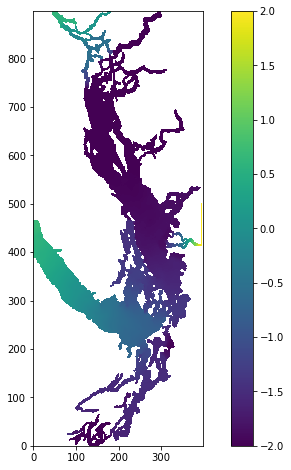

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
ssh = ma.masked_array(VAT26.variables['sossheig'][23,:,:], mask=1-tmask[0,...])
mesh = ax.pcolormesh(ssh, vmax = 2, vmin = -2)
fig.colorbar(mesh)

In [8]:
restart = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSea/VAT26/SalishSea_00516241_restart.nc')

In [9]:
fse3u = np.zeros(umask.shape)
fse3v = np.zeros(vmask.shape)
for k in range(40):
    fse3tk = restart.variables['fse3t_n'][0,k,...]
    fse3u[k,:,:-1]  = 0.5 * (fse3tk[:,:-1] + fse3tk[:,1:])
    fse3v[k,:-1,:]  = 0.5 * (fse3tk[:-1,:] + fse3tk[1:,:])

In [10]:
hu_0 = mesh_mask.variables['e3u_0'] * umask
hu = hu_0.sum(axis=1).sum(axis=0) 

hv_0 = mesh_mask.variables['e3v_0'] * vmask
hv = hv_0.sum(axis=1).sum(axis=0)

# In U

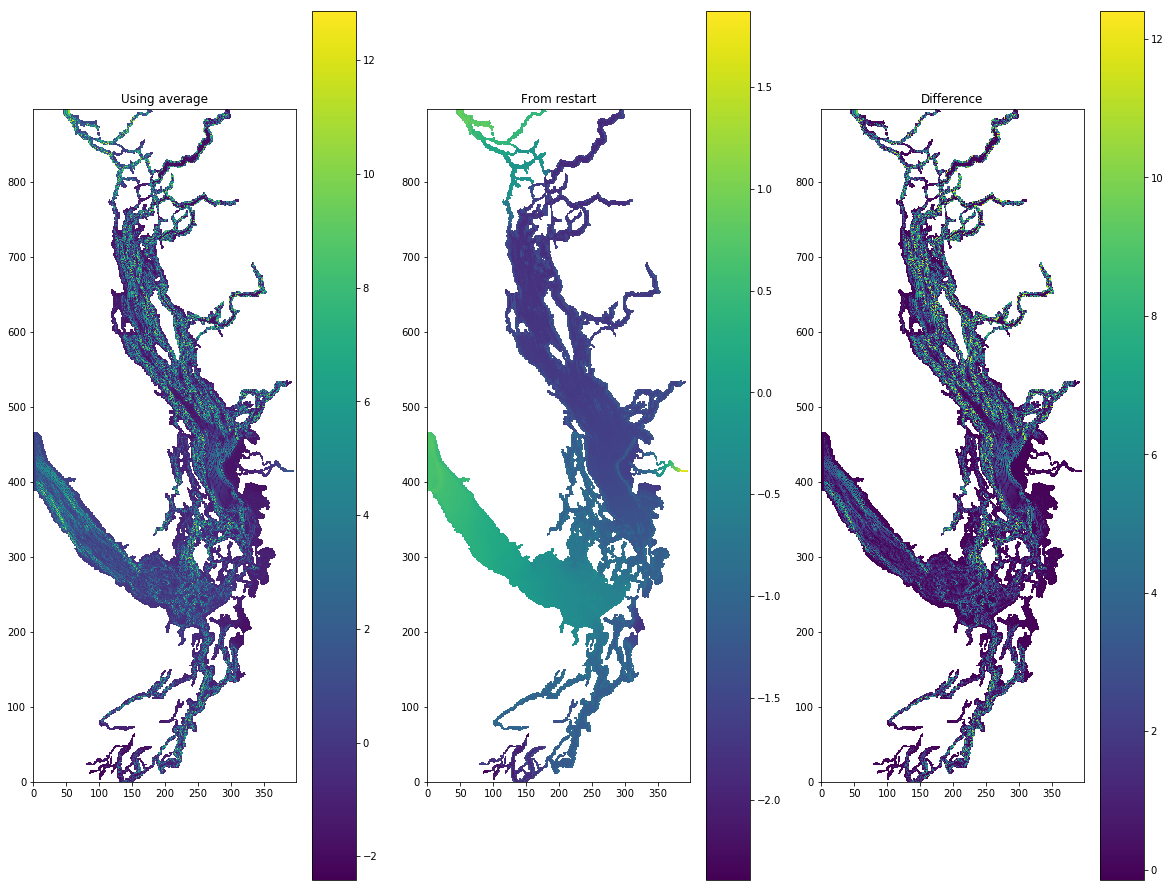

In [85]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=((20,16)))
ussh = ma.masked_array((umask * fse3u).sum(axis=0) - hu,mask=1-umask[0,...])
mesh1 = ax1.pcolormesh(ussh)
fig.colorbar(mesh1,ax=ax1)
viz_tools.set_aspect(ax1)
ax1.set_title('Using average')

ussh2 = ma.masked_array((restart2.variables['fse3u_n'][0,...] * umask).sum(axis=0) - hu,mask=1-umask[0,...])
mesh1 = ax2.pcolormesh(ussh2)
fig.colorbar(mesh1,ax=ax2)
viz_tools.set_aspect(ax2)
ax2.set_title('From restart')

difference = ussh - ussh2
mesh3 = ax3.pcolormesh(difference)
fig.colorbar(mesh3,ax=ax3)
viz_tools.set_aspect(ax3)
ax3.set_title('Difference');

# In V

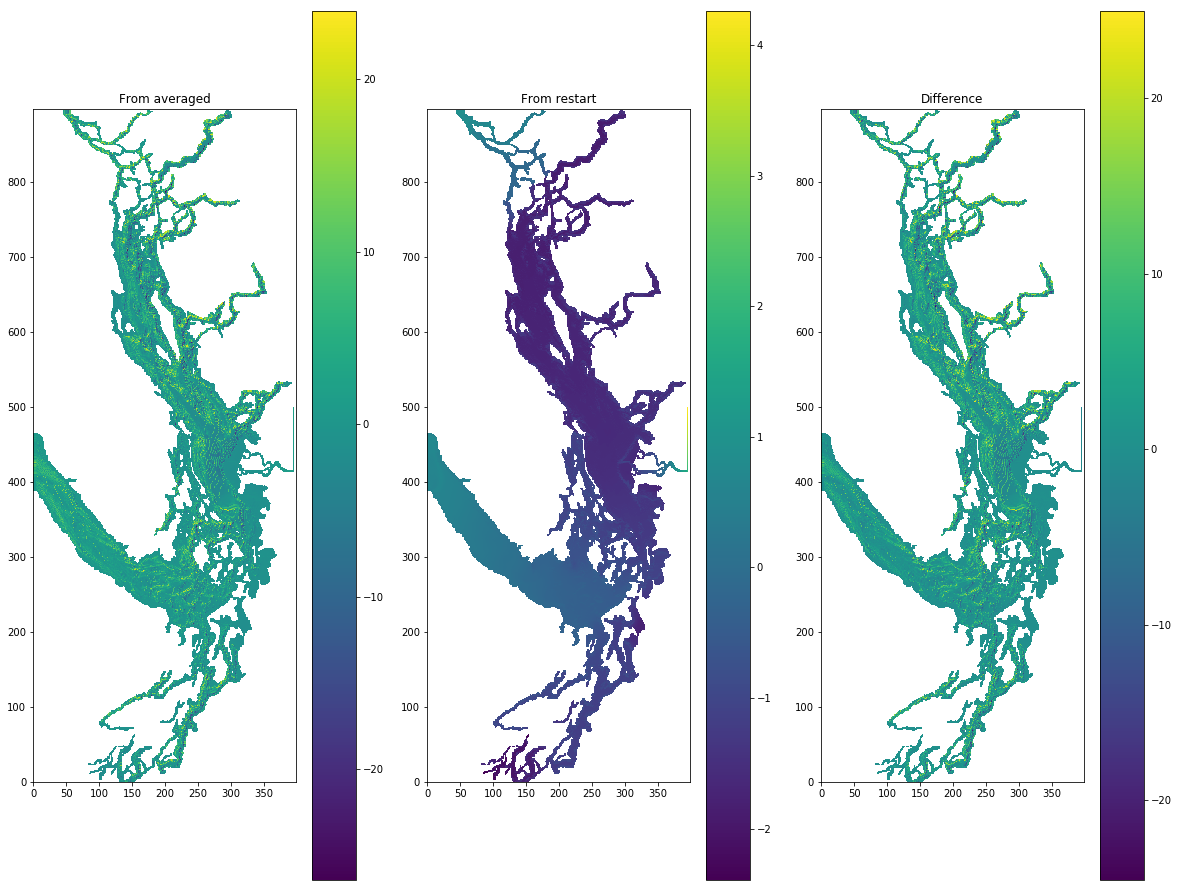

In [86]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=((20,16)))
vssh = ma.masked_array((vmask * fse3u).sum(axis=0) - hv,mask=1-vmask[0,...])
mesh1 = ax1.pcolormesh(vssh)
fig.colorbar(mesh1,ax=ax1)
viz_tools.set_aspect(ax1)
ax1.set_title('From averaged')

vssh2 = ma.masked_array((restart2.variables['fse3v_n'][0,...] * vmask).sum(axis=0) - hv,mask=1-vmask[0,...])
mesh2 = ax2.pcolormesh(vssh2)
fig.colorbar(mesh2,ax=ax2)
viz_tools.set_aspect(ax2)
ax2.set_title('From restart')

difference = vssh - vssh2
mesh3 = ax3.pcolormesh(difference)
fig.colorbar(mesh3,ax=ax3)
viz_tools.set_aspect(ax3)
ax3.set_title('Difference');